In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
%matplotlib inline


In [2]:
N=1500
mean1=[6,14]
mean2=[10,6]
mean3=[14,14]
cov=[[3.5,0],[0,3.5]]

In [7]:
np.random.seed(50)
x=np.random.multivariate_normal(mean1,cov,int(N/6))
x=np.concatenate((x,np.random.multivariate_normal(mean2,cov,int(N/6))))
x=np.concatenate((x,np.random.multivariate_normal(mean3,cov,int(N/6))))
x=np.concatenate((x,20*np.random.rand(int(N/2),2)))

In [8]:
y=np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

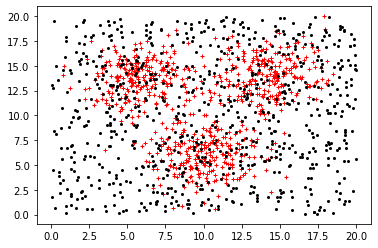

In [10]:
plt.plot(x[:int(N/2),0],x[:int(N/2),1], 'r+',x[int(N/2):,0],x[int(N/2):,1],'k.',ms=4)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
len(X_test)

300

In [16]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [17]:
maxDepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [18]:
trainAcc=np.zeros(len(maxDepths))
testAcc=np.zeros(len(maxDepths))

In [19]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
index=0
for depth in maxDepths:
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    clf=clf.fit(X_train,y_train)
    y_predTrain=clf.predict(X_train)
    y_predtest=clf.predict(X_test)
    trainAcc[index]=accuracy_score(y_train,y_predTrain)
    testAcc[index]=accuracy_score(y_test,y_predtest)
    index += 1

In [22]:
trainAcc

array([0.6325    , 0.68166667, 0.71666667, 0.725     , 0.75583333,
       0.78      , 0.79416667, 0.8075    , 0.82583333, 0.93333333,
       0.995     , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [23]:
testAcc

array([0.64      , 0.7       , 0.71666667, 0.71333333, 0.72666667,
       0.74333333, 0.74666667, 0.73666667, 0.72      , 0.69333333,
       0.69      , 0.66333333, 0.68333333, 0.68333333, 0.68666667,
       0.67666667, 0.68333333])

Text(0, 0.5, 'Accuracy')

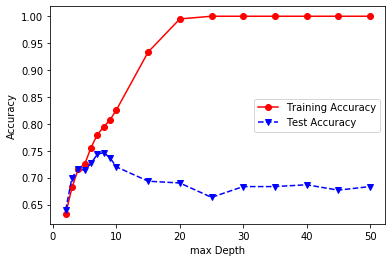

In [26]:
plt.plot(maxDepths, trainAcc, 'ro-', maxDepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('max Depth')
plt.ylabel('Accuracy')

The plot shows that the accuracy will continue to improve as the max depth of the tree increases, i.e. the model becomes more complex. the test accuracy initially improves up 5 but decreases after due to model overfitting